<h1 style="color:green; text-align:center;"> Homework 4: Workflow, NumPy, and Matplotlib</h1> 

---
General:
- Please submit your homework as a Jupyter notebook with well-commented code, plots, and your written summary
- Make sure to submit other relevent file(s) required to run the main parts of your code
- Late submission policy is same as Homework 3
- Total 80 points
---

In [1]:
#Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import stats
import os
import zipfile
from urllib.request import urlretrieve

## 1. Problem statement
In this assignment, you will analyze air quality data for the core-based statistical area (CBSA) of Miami to understand correlations between different air quality variables. You will be working with EPA daily air quality data for PM2.5, PM10, wind and temperature from 01-01-2018 to 31-12-2019. To complete the assignment, you will mainly use the skills learned in the lessons on Data Science Workflow, NumPy, and Matplotlib including Exercises 6, 7 and 8. 

## 2. Data Preparation

### 2.1 Data Collection (8 points)

Retrieve data from the [Pre-Generated Data Files - Daily Data](https://aqs.epa.gov/aqsweb/airdata/download_files.html#Daily) for PM2.5, PM10, Wind, and Temperature for the years 2018 and 2019 within the Miami Core Based Statistical Area (CBSA).

Instructions (2 points):
- Download and unzip the file using Python libraries
- Filter the data by CBSA region
- Retain relevant columns
- Save the filtered data for each parameter and each year to a CSV file

For help check Pandas lesson and Exercise 6, and use language models.

In [2]:
#ChatGPT 3.5 Turbo Code

# 1. Define Attributes dictionary for air quality data


# 2. Define region and CBSA_Name_Value
region = 'Miami'
CBSA_Name_Value = 'Miami-Fort Lauderdale-West Palm Beach, FL'

# 3. Initialize download_count
download_count = 0

# 4. Loop through each year and download files

        # 5. Show download progress

        # Download file
     
        # 6. Unzip file
     
        # 7. Read csv file
       
        # 8. Delete zip file if exists
      
        # 9. Delete csv file if exists
        
        # 10. Handle warning in raw_data
     
        # 11. Update 'Unit' in Attributes
       
        # 12. Filter by CBSA_Name_Value
      
        # 13. Keep required columns
    
        # 14. Convert 'Date Local' to datetime and set as index
     
        # 15. Update 'Records' in Attributes
         
        # 16. Save raw_data
   

# 17. Create DataFrame from Attributes

# 18. Save df_Attributes

# 19. Display df_Attributes


Download 1: 2018 : PM2.5 FRM/FEM Mass : daily_88101_2018.zip
Download 2: 2018 : PM2.5 non FRM/FEM Mass : daily_88502_2018.zip
Download 3: 2018 : PM10 Mass : daily_81102_2018.zip
Download 4: 2018 : Winds : daily_WIND_2018.zip
Download 5: 2018 : Temperature : daily_TEMP_2018.zip
Download 6: 2019 : PM2.5 FRM/FEM Mass : daily_88101_2019.zip
Download 7: 2019 : PM2.5 non FRM/FEM Mass : daily_88502_2019.zip
Download 8: 2019 : PM10 Mass : daily_81102_2019.zip
Download 9: 2019 : Winds : daily_WIND_2019.zip
Download 10: 2019 : Temperature : daily_TEMP_2019.zip


,Category,Parameter,FileID,Unit,Records
0,Particulates,PM2.5 FRM/FEM Mass,88101,Micrograms/cubic meter (LC),7409
1,Particulates,PM2.5 non FRM/FEM Mass,88502,Micrograms/cubic meter (LC),5359
2,Particulates,PM10 Mass,81102,Micrograms/cubic meter (25 C),2753
3,Meteorological,Winds,WIND,Knots,1440
4,Meteorological,Temperature,TEMP,Degrees Fahrenheit,730


### 2.2 Data integration (8 points)

Create a unified dataset from multiple CSV files.

Instructions (2 points each):
- Create a DataFrame with a daily index covering the study period and containing values for each parameter
- Resample the 'Arithmetic Mean' column to determine the maximum daily value
- Resample the 'Arithmetic Mean' column to identify the maximum daily value for the 'Units of Measure' of 'Knots' for wind
- Save the combined dataset to a CSV file named 'data_Miami.csv'

For help check Pandas lesson and Exercise 6, and use language models.

In [3]:
region = 'Miami'

# Read 'Data/L2_Structured/Attributes.csv' as `df_Attributes` DataFrame

# Create `data` DataFrame with daily index from 2019-01-01 to 2021-12-31 
# and with columns such that the column labels are the 'FileID' column in `df_Attributes`

# Loop  for 2018 and 2019
    # Loop for each value in 'FileID'
        # Read f'Data/L2_Structured/daily_{fileID}_{year}_{region}.csv' as `raw_data` DataFrame
            # Set column 'Date Local' as datetime index
                # Resample the column 'Arithmetic Mean' in `raw_data` with .max() as `resampled_arithmetic_mean`
               
            # Resample the column 'Arithmetic Mean' in `raw_data` with .max() as `resampled_arithmetic_mean`
          
            # Copy the values of resampled_arithmetic_mean for each fileID into its corresponding column in `data`
            # with the same fileID. Dates must match.

# Save `data` DataFrame as 'data_{region}.csv' at this path 'Data/L3_Integrated' and create folder if it does not exist

# Display `data` DataFrame using `display()`


FileID,88101,88502,81102,WIND,TEMP
2018-01-01,18.5875,44.8875,36,NaN,66.5
2018-01-02,3.5,4.754167,14,NaN,60.25
2018-01-03,5.508333,2.108333,7,NaN,60.333333
2018-01-04,8.2875,7.758333,12,NaN,51.625
2018-01-05,8.2,9.870833,15,NaN,51.0
...,...,...,...,...,...
2019-12-27,6.743478,6.083333,19.0,7.158333,74.75
2019-12-28,7.7875,5.766667,27.0,6.6875,74.833333
2019-12-29,9.2625,7.445833,32.0,6.525,75.625
2019-12-30,11.417391,7.854167,32.0,3.733333,75.833333


### 2.3 Data transformation (4 points)

Convert data into a format suitable form for analysis. 

Instructions (2 points each):
- Combine 'PM2.5 FRM/FEM Mass' and 'PM2.5 non FRM/FEM Mass' for both samplers into one 'PM2.5' set
- Rename column labels from FileIDs to parameter names for clarity (e.g., '81102' to 'PM10')

For help check Pandas lesson and Exercise 6, and use language models.

In [4]:
display(df_Attributes)

,Unnamed: 0,Category,Parameter,FileID,Unit,Records
0,0,Particulates,PM2.5 FRM/FEM Mass,88101,Micrograms/cubic meter (LC),7409
1,1,Particulates,PM2.5 non FRM/FEM Mass,88502,Micrograms/cubic meter (LC),5359
2,2,Particulates,PM10 Mass,81102,Micrograms/cubic meter (25 C),2753
3,3,Meteorological,Winds,WIND,Knots,1440
4,4,Meteorological,Temperature,TEMP,Degrees Fahrenheit,730


In [5]:
region = 'Miami'

# 1. Read 'data_{}.csv' as `data` DataFrame with datetime index from 'Data/L3_Integrated'

# 2. In `data`, create column 'PM2.5' which is mean of columns '88101', '88502'

# 3. Create a new DataFrame `aqi_data` as a copy of `data` which shall include specific columns


# 4. Rename columns labels in `aqi_data` DataFrame


# 5. Get a NumPy representation of `aqi_data` DataFrame using `.values` method

# 6. Save the `aqi_data` DataFrame as 'aqi_data_{region}.csv' in 'Data/L4_Transformed' and create folder if it does not exist


### 2.4 Data cleaning (8 points)

Remove rows with NaNs.

Instructions (4 points each)
- Read data as NumPy array
- Clean data by removing NaN rows

For help check NumPy lesson and Exercise 7, and use language models.

In [6]:
# Read the data from the CSV file into NumPy array
# Columns: [datetime-empty], 'PM2.5', PM10, 'WIND', 'TEMP']

#Clean data by removing rows with NaN


Original data shape(data) (dates) (values): (730, 5) (730,) (730, 4)
Cleaned data shape(data) (dates) (values): (712, 5) (712,) (712, 4)


### 2.5 Additional information

Use this additional information in your analysis.

In [7]:
# Air quality parameter information
parameters = ['PM2.5', 'PM10','WIND', 'TEMP']
units = ['µg/m³', 'µg/m³', 'Knots', '°F']
limits = [        
    34 , # Healthly limit for PM2.5 in µg/m³
    155 , # Healthly limit for PM10 in µg/m³
    64,  # Hurricane wind speed in knots
    105  # Heat wave temperature in °F
] 

## 3. Data analysis


### 3.1 Summary statistics (10 points)

Show summary statistics of your data. 

Instructions (5 points each)
- Calculate the minimum, mean, median, and maximum values for each parameter
- Display the results in a tabular format that includes the parameter name, unit, limit, minimum value, mean value, median value, and maximum value. Hint: You can use a DataFrame for this task. If you need assistance with creating a pandas DataFrame, you can refer to online resources or use a language model

For help check NumPy lesson and Exercise 7, and use language models. 

In [8]:
# Calculate mean concentrations 

# Create a DataFrame

display(df)

,Unit,Limit,Min,Mean,Median,Max
PM2.5,µg/m³,34,4.3,9.5,8.7,34.5
PM10,µg/m³,50,7.0,23.3,21.0,136.0
WIND,Knots,64,1.9,5.6,5.5,14.2
TEMP,°F,105,52.3,75.9,77.3,85.3


### 3.2 Line Plot (10 points)

Create line plot using Matplotlib for each of the four parameters and include appropriate labels and annotations.

Instructions (2 points each)
- Create a 4x1 subplot grid to visualize the four parameters individually
- If any parameter value exceeds the health limit, display a vertical line indicating the limit
- Ensure a shared x-axis for all subplots
- Set the x-axis limits from January 1, 2018, to January 1, 2020
- Include appropriate labels with units and legends for clarity

For help check Matplotlib lesson and Exercise 8, and use language models.

PM2.5 exceeds healthy limit


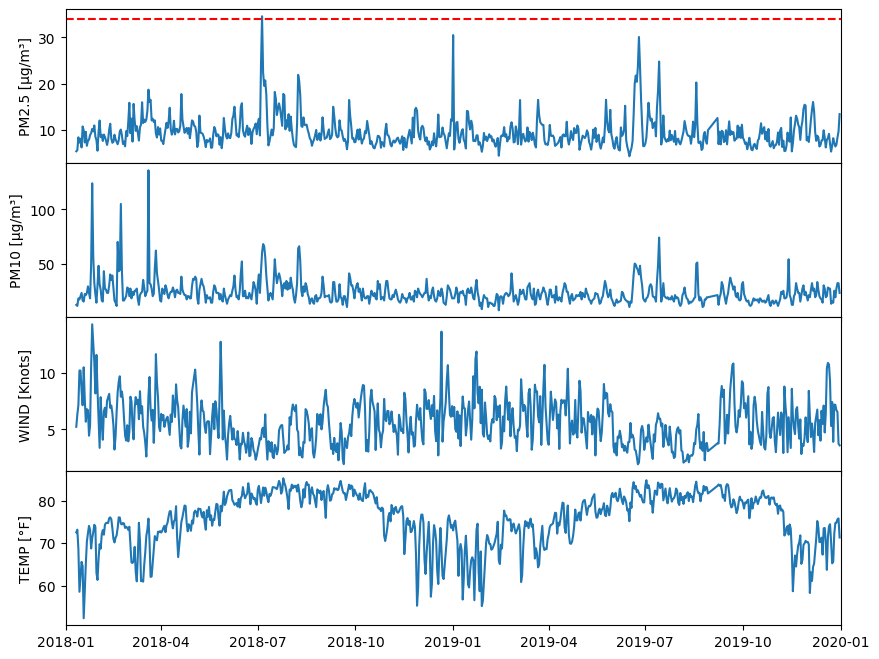

In [9]:
#Create Figure and Axes objects (6x1) 
# with figure size 10 inche long by 8 wide inches and shared x-axis

#Change horizontal spaces between subplot
    
    
    # Plot times as x-variable and air qualiy parameter as y-variable

    # Add a horizontal line for healthy limit

    # Set the x-axis limits using the datetime objects
    # Note we need to convert date strings to datetime objects because our NumPy area has datetime

    # Set y-label


### 3.3 Boxplot (10 points)

Create a boxplot using Matplotlib to visualize the distribution of each parameter, and include appropriate labels and annotations.

Instructions (2 points each):
- Construct a 2x2 subplot grid to represent each parameter separately
- If any parameter value exceeds the health limit, show a vertical line with annotation text indicating the limit
- Adjust the y-axis limits to prevent annotation text from obscuring data
- Set xticklabel as parameter name 
- Ensure clear labels with units and legends for better understanding

For help check Matplotlib lesson and Exercise 8, and use language models.

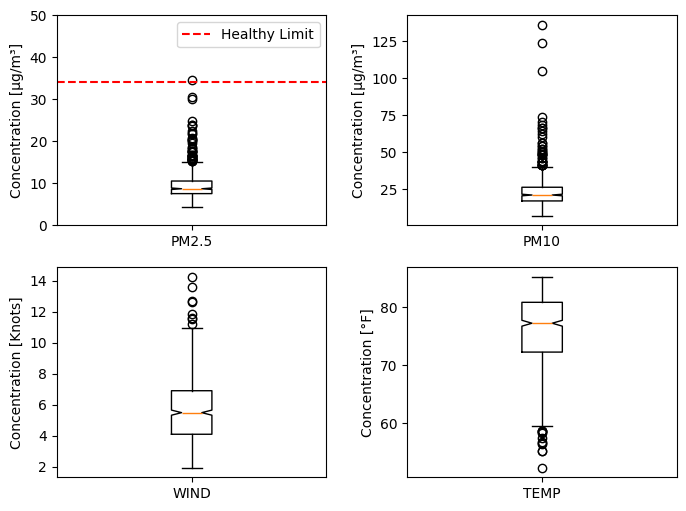

In [13]:
# Create a figure object and Axes object using subplots() method
n= 2 #Number of rows
m= 2 #Number of columns

# Increase the horizontal space (wspace)and vertical (hspace) space between subplots

#Loop for each parameter

    # Prepare data for pre and post
    
    # Select axex

    # Plot data 

    # Set y label

    #Add a horizontal line at the healthy limit if exceeded
    ## Maximum concentration value in the dataset

    ## Add a horizontal dashed red line at the healthy limit value
     
        ### Add legend

        #y-limit

    # Set xtick Label


### 3.4 Correlation Coefficients (12 points)

Analyze the correlation between PM2.5, PM10, wind speed, and temperature by calculating and plotting correlation coefficients

Instructions (4 points each)
- Conduct statistical analysis to calculate correlation coefficients. Hint: You can use `np.corrcoef` function
- Plot the correlation coefficients to visualize the relationships between the variables including adding a colorbar. Hint: You can use `ax.imshow` plot.
- Display to screen the correlation coefficents for each pair of parameters for the four parameters.

While this specific analysis method may not have been covered in class, a key objective of this course is to foster independent learning and problem-solving skills. You can leverage resources such as language models and other online resources to explore new analysis techniques and Python libraries. This approach to learning ensures adaptability and proficiency in tackling diverse data analysis challenges.

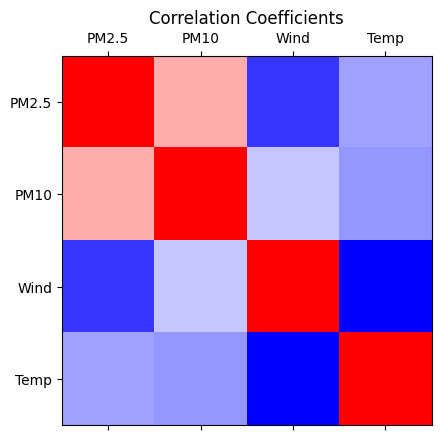

Correlation coefficient between PM2.5 and PM10: 0.55
Correlation coefficient between PM2.5 and WIND: -0.18
Correlation coefficient between PM2.5 and TEMP: 0.10
Correlation coefficient between PM10 and WIND: 0.19
Correlation coefficient between PM10 and TEMP: 0.07
Correlation coefficient between WIND and TEMP: -0.32


In [14]:
# Calculate correlation coefficients

# Create a figure and axes

# Set the title and labels


#Display results to screen


### 3.5 Discussion (10 points)

Critically discuss the correlation coefficients calculated and the relationships observed between PM2.5, PM10, wind speed, and temperature. 

Instructions (2 points each):
- Discuss correlation coefficients for PM2.5, PM10, wind speed, and temperature, showing understanding of the statistical method used
- Explain observed correlations, discussing expected and unexpected relationships with references to relevant studies
- Discuss analysis limitations and suggest areas for further analysis to enhance understanding of these relationships in air quality assessment
- Ensure a well-organized, coherent response within 150-300 words
- Use appropriate citations to support arguments

The learning objective of this question is to help you to enhance your critical thinking in data analysis, use of references to support your arguments, and clarity in presenting findings. This shall help you to prepare for your final project.

Add discussion here.